# Assignment 6

Due: **10:00 16 July 2024**

**Online submission** at via github classroom  

# 1. Interpolating a function of one variable **[25 points]**

Load the data in `sparse_1.dat`. You will try to find a smoothen data using interpolation.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# load the datafile
data1 = np.loadtxt("Data/sparse_1.dat")
print(data1)

[[-1.50000000e+01  4.33525227e-02]
 [-1.24416667e+01 -9.99713212e-03]
 [-9.88333333e+00 -4.47878431e-02]
 [-7.32500000e+00  1.17859582e-01]
 [-4.76666667e+00 -2.09481258e-01]
 [-2.20833333e+00  3.63878134e-01]
 [ 3.50000000e-01  9.79708021e-01]
 [ 2.90833333e+00  7.94784404e-02]
 [ 5.46666667e+00 -1.33310917e-01]
 [ 8.02500000e+00  1.22792768e-01]
 [ 1.05833333e+01 -8.65724651e-02]
 [ 1.31416667e+01  4.14013858e-02]
 [ 1.57000000e+01  5.07209158e-04]]


**a)** Plot the data. Can you identify the trend? **5 points**

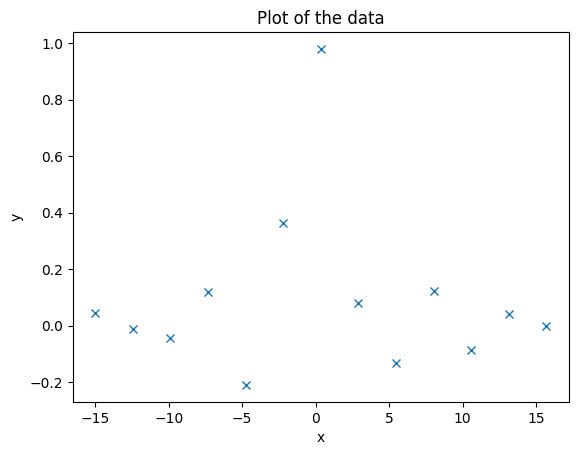

In [4]:
plt.plot(data1[:,0], data1[:,1], "x")
plt.title("Plot of the data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [2]:
%%latex
The data does not seem to have any specific trend beside of the peak in the middle.

<IPython.core.display.Latex object>

**b)** Smooth the data by interpolating the data at a larger number of $x$-coordinates. You can use the `interp1d` method in `scipy.interpolate` using the linear method (or interpolate the points manually). Plot your interpolated points with the original data points **10 points**

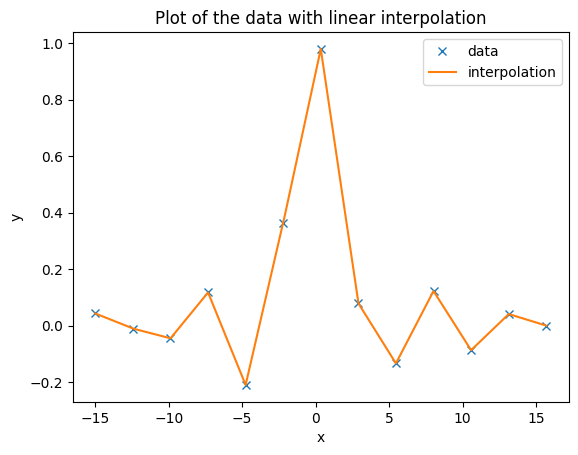

In [5]:
def interpol(data, kindl):
    f    = interpolate.interp1d(data[:,0], data[:,1], kind=kindl)
    xmin = np.min(data[:,0])
    xmax = np.max(data[:,0])
    x    = np.linspace(xmin, xmax, 10000)
    plt.plot(data[:,0], data[:,1], "x", label="data")
    plt.plot(x, f(x), label="interpolation")
    plt.title("Plot of the data with "+kindl+" interpolation")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

interpol(data1, "linear")

**c)** Test a few other methods ('nearest', 'zero', 'slinear', 'quadratic', and 'cubic') to interpolate the data. Compare them to the linear method. Which appears to be most accurate? Can you identify the underlying function? **10 points**

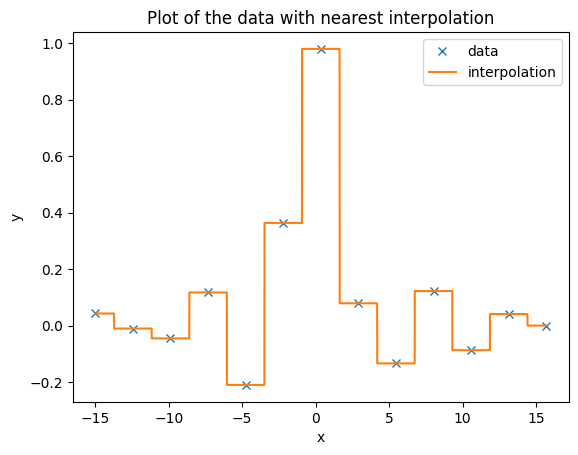

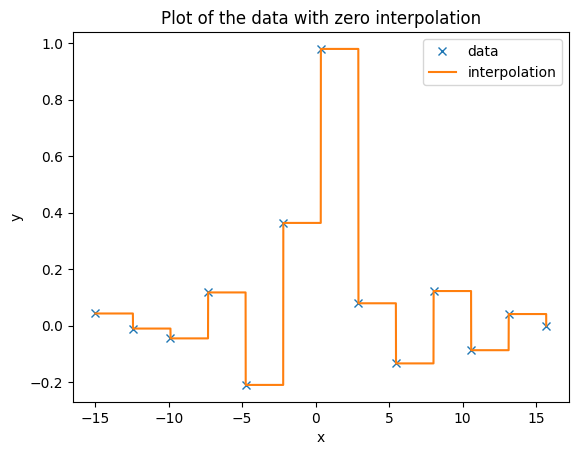

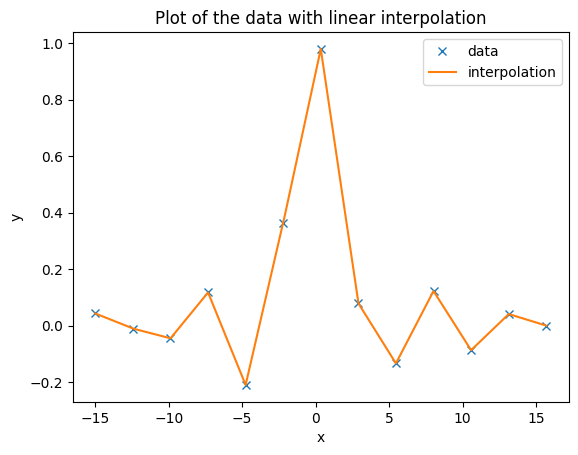

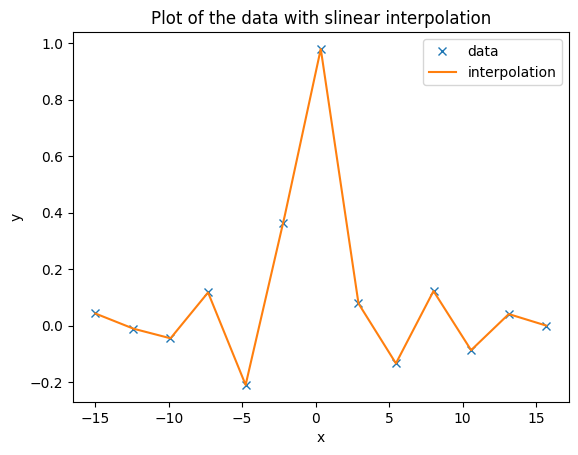

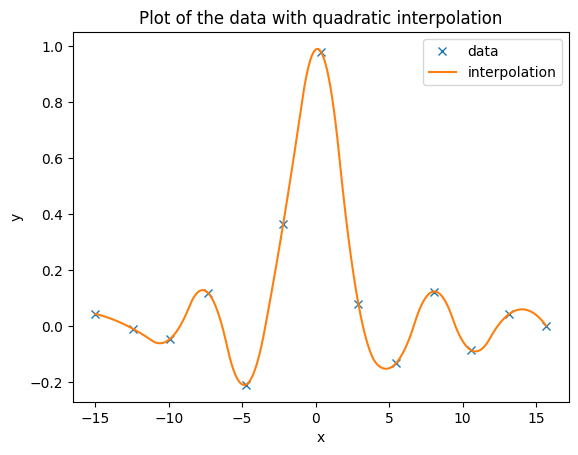

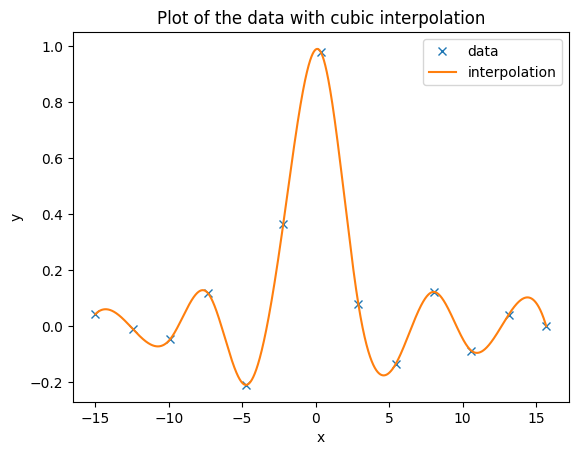

In [6]:
interpol(data1, "nearest")
interpol(data1, "zero")
interpol(data1, "linear")
interpol(data1, "slinear")
interpol(data1, "quadratic")
interpol(data1, "cubic")


In [5]:
%%latex
Nearest interpolation: returns the $y$-value of the nearest point on the $x$-axis.

Zero interpolation: returns the $y$-value of the last point on the $x$-axis.

Linear interpolation: returns the $y$-value of the linear fit in between two points.

Slinear interpolation: returns the $y$-value of the linear fit in between two points. There is no difference to the linear interpolation besides that the slinear interpolation is part of the spline interpolations using linear functions. Mathematically there should be no difference.

Quadratic interpolation: uses quadratic functions to interpolate.

Cubic interpolation: uses functions of third degree to interpolate.

The underlying function looks with the interpolation like an overlay of different frequencies. If the function really is a combination of different overlaid frequencies, the cubic interpolation is the best one to visualize it.


<IPython.core.display.Latex object>

# 2. Using cubic spline for a function of two variables **[25 points]**

Load the data in `data_2.dat`. It contains data in 3 dimensions, where the third dimension is a step function depending on position of the first two.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# load the datafile
data2 = np.loadtxt("Data/data_2.dat")
print(data2.shape)
xyshape = int(data2[:,0].size**0.5)
xyaxis  = data2[0:xyshape,0]
data2Arr = np.reshape(data2[:,2], (xyshape, xyshape))
print(data2Arr.shape)
print(data2)



(2500, 3)
(50, 50)
[[-5.         -5.          1.        ]
 [-4.79591837 -5.          1.        ]
 [-4.59183673 -5.          1.        ]
 ...
 [ 4.59183673  5.          1.        ]
 [ 4.79591837  5.          1.        ]
 [ 5.          5.          1.        ]]


**a)** The data itself is well-sampled. Verify this by plotting it. **5 points**

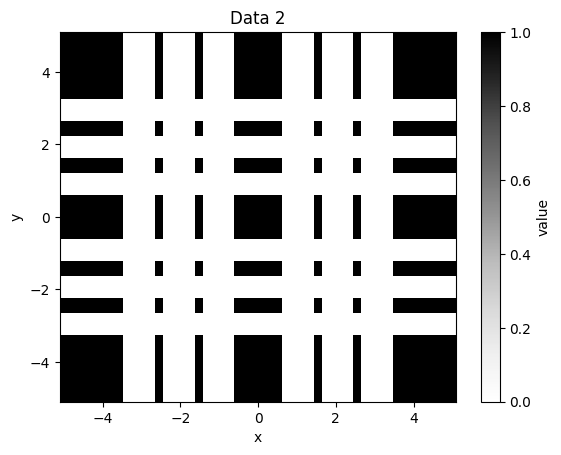

In [3]:
plt.pcolormesh(xyaxis, xyaxis, data2Arr, cmap="Greys")
cbar = plt.colorbar()
cbar.set_label("value")
plt.title("Data 2")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

**b)** Now compare the various methods of interpolation using `interp2d()` from `scipy.interpolate` ('linear', 'cubic', 'quintic') by plotting the resulting interpolated grids. Which is the most-accurate method? What are the pros/cons to each method? **20 points**

/tmp/ipykernel_5020/689804347.py:2: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f    = interpolate.interp2d(data[:,0], data[:,1], data[:,2], kind=kindl)
/tmp/ipykernel_5020/689804347.py:12: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `Linea

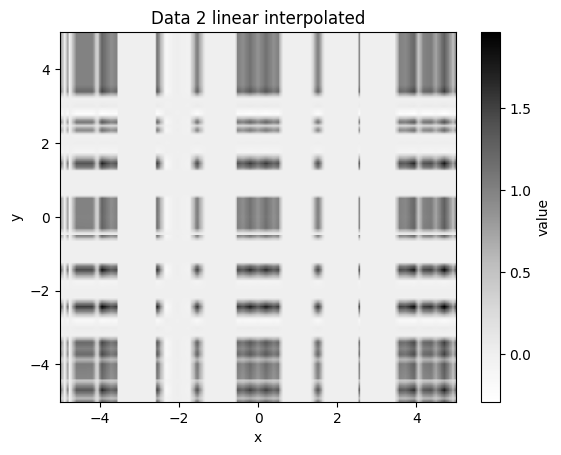

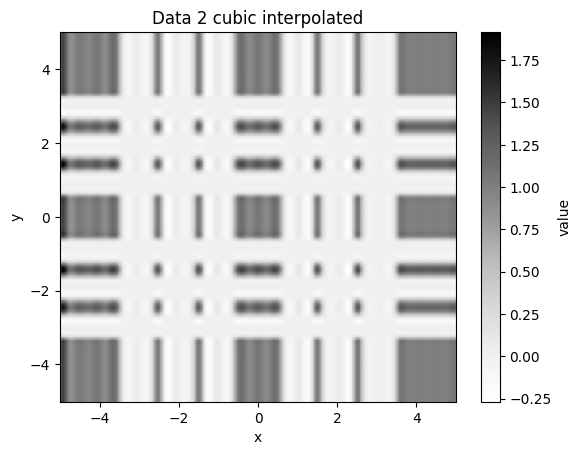

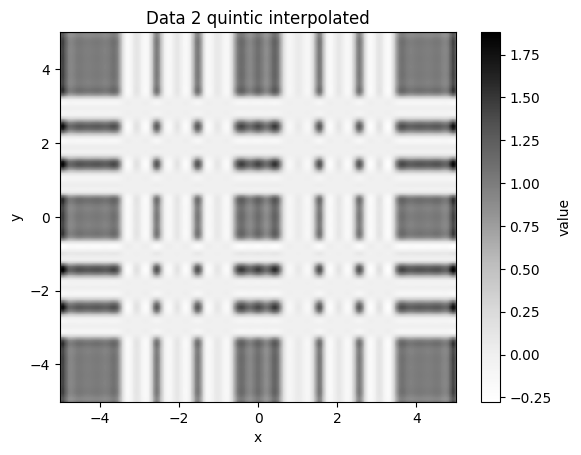

In [4]:
def interpol2d(data, kindl):
    f    = interpolate.interp2d(data[:,0], data[:,1], data[:,2], kind=kindl)
    res = 500
    xmin = np.min(data[:,0])
    xmax = np.max(data[:,0])
    x    = np.linspace(xmin, xmax, res)
    
    ymin = np.min(data[:,1])
    ymax = np.max(data[:,1])
    y    = np.linspace(ymin, ymax, res)
    
    plt.pcolormesh(x, y, f(x,y), cmap="Greys")
    cbar = plt.colorbar()
    cbar.set_label("value")
    plt.title("Data 2 "+kindl+" interpolated")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

interpol2d(data2, "linear")
interpol2d(data2, "cubic")
interpol2d(data2, "quintic")


In [12]:
%%latex
If we do not change the resolution (i.e., keeping the variable res=50), all the three pictures are like the original. This is because all the interpolated points are on the original point. If we increase the resolution by a factor of 10 (i.e., res=500), we can see the differences between the interpolation methods. The linear interpolation is the worst one, since there are small lines (around $x=2$ and $x=-2$) that are cut off. The cubic and quintic interpolation are smoothing the edges similarly.

<IPython.core.display.Latex object>

# 3. Smoothing a noisy signal **[50 points]**

Load the data in `data_noisy.dat`. Here you will find columns for $x$, $y_1$, and $y_2$. You will investigate how well the data can be smoothed using different filters.

(1000, 3)
[[ 0.00000000e+00 -4.37752126e-02 -3.84055645e-02]
 [ 1.00100100e-02  8.62413856e-02  6.12115182e-02]
 [ 2.00200200e-02  3.86346134e-02  4.86095865e-02]
 ...
 [ 9.97997998e+00 -2.94121411e-03  1.11954103e-02]
 [ 9.98998999e+00 -3.54876457e-02 -1.95078339e-02]
 [ 1.00000000e+01  5.46429278e-02  2.72126228e-02]]


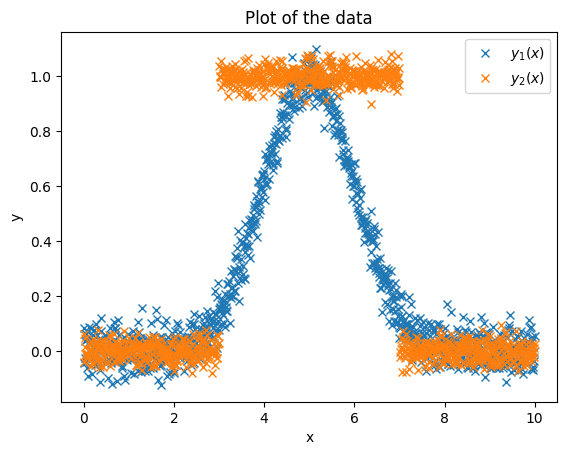

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# load the datafile
data3 = np.loadtxt("Data/data_noisy.dat")
print(data3.shape)
print(data3)


plt.plot(data3[:,0], data3[:,1], "x", label=r"$y_1(x)$")
plt.plot(data3[:,0], data3[:,2], "x", label=r"$y_2(x)$")
plt.title("Plot of the data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

**a)** Apply a moving-average filter to both datasets with $10$- and $20$-point filters. Compare this to $10$- and $20$-point triangular smoothing of both datasets. Discuss the difference between these methods, and how accurate is the interpolated data. Plot any filtered data with the original dataset. **20 points**

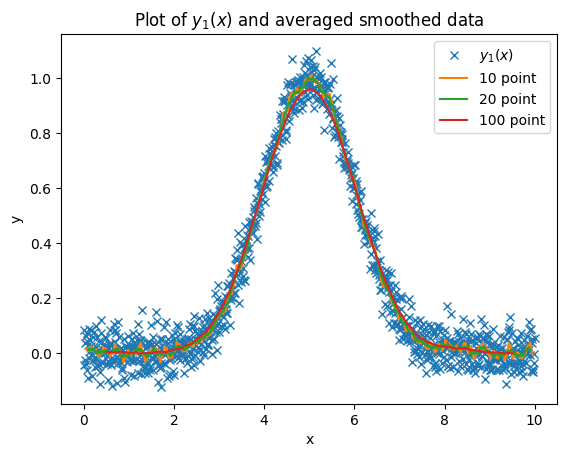

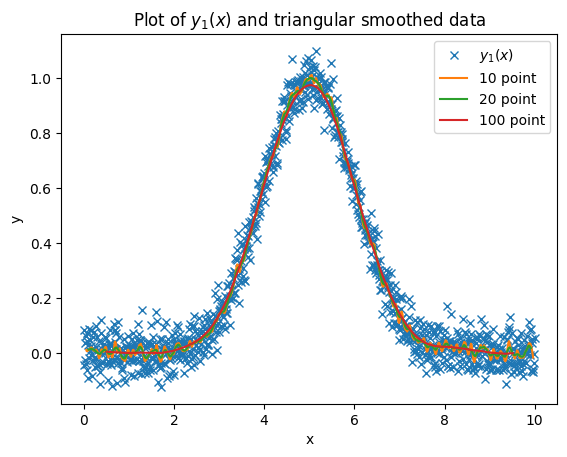

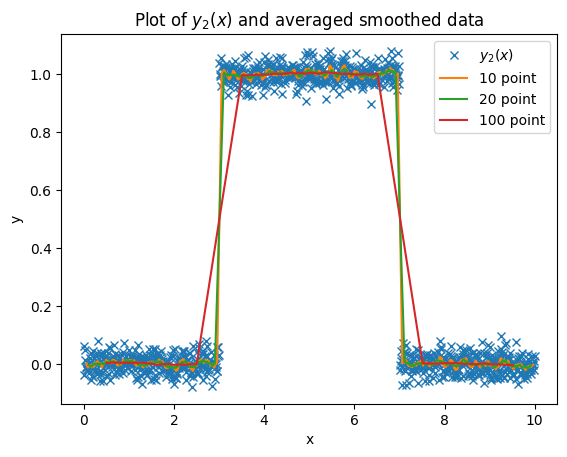

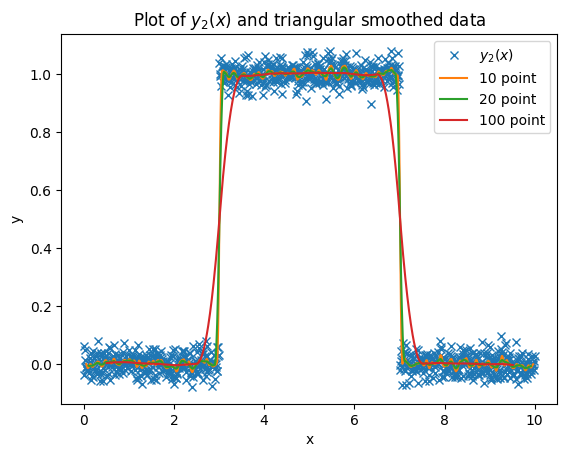

In [15]:
# only valid for even numbers for num and N:
def mov(xdata, ydata, num, hom):
    
    # create new array (needs N-num+1 rows)
    newData = np.zeros((xdata[:].size-num+1, 2))
    
    # homogeneous smoothing:
    if hom:
        # go through x and y values:
        for i in range(newData[:,0].size):
            # calculate new x values:
            newData[i,0] = (xdata[int(num/2)+i]+xdata[int(num/2)+1+i])/2
            # calculate smoothed y-values:
            newData[i,1] = np.sum(ydata[(0+i):(num+i)])/num
        return (newData)
    # triangular smoothing:
    else:
        # create the triangular array:
        trian = np.zeros(num)
        trian[0:int(num/2)] = np.arange(1,int(num/2)+1)
        trian[int(num/2):trian.size] = np.arange(int(num/2),0, -1)
        
        # define the norm
        norm = np.sum(trian)
        
        # go through x and y values:
        for i in range(newData[:,0].size):
            # calculate new x values:
            newData[i,0] = (xdata[int(num/2)+i]+xdata[int(num/2)+1+i])/2
            # calculate smoothed y-values:
            newData[i,1] = np.sum(ydata[(0+i):(num+i)]*trian)/norm
        return (newData)
    
def nplot(xdata, ydata, labelus, booleus):
    if booleus:
        stri = "averaged"
    else:
        stri = "triangular"

    newData10  = mov(xdata, ydata,  10, booleus)
    newData20  = mov(xdata, ydata,  20, booleus)
    newData100 = mov(xdata, ydata, 100, booleus)
    plt.plot(xdata, ydata, "x", label=labelus)
    plt.plot(newData10[:,0], newData10[:,1],  label=r"10 point")
    plt.plot(newData20[:,0], newData20[:,1],  label=r"20 point")
    plt.plot(newData100[:,0], newData100[:,1],  label=r"100 point")
    plt.title("Plot of "+labelus+" and "+stri+" smoothed data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

nplot(data3[:,0], data3[:,1], r"$y_1(x)$", True)
nplot(data3[:,0], data3[:,1], r"$y_1(x)$", False)

nplot(data3[:,0], data3[:,2], r"$y_2(x)$", True)
nplot(data3[:,0], data3[:,2], r"$y_2(x)$", False)


In [21]:
%%latex
The average and the triangular smoothing look pretty similar on the Gaussian data. Especially on the smoothing itself, it seems as if there would be no difference regarding small peaks. If we consider the general height of the curve, one can see that the averaged smoothing using 100 points differs strongly from the initial curve. The triangular smoothing using 100 points still follows the initial data points quite well, being very smooth.

For the theta-function data, the averaging curve seems to increase linearly at the jump for large number of data points used for smoothing. The triangular smoothing makes a smoother transition. But both, the averaging and the triangular smoothing, are not doing a good job for this function.

<IPython.core.display.Latex object>

**b)** Apply the Savitzky-Golay filter to both datasets and plot them. How does this method compare to the previous ones? **30 points**

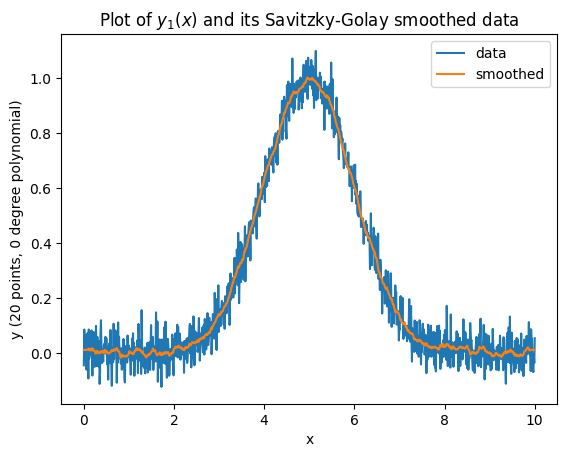

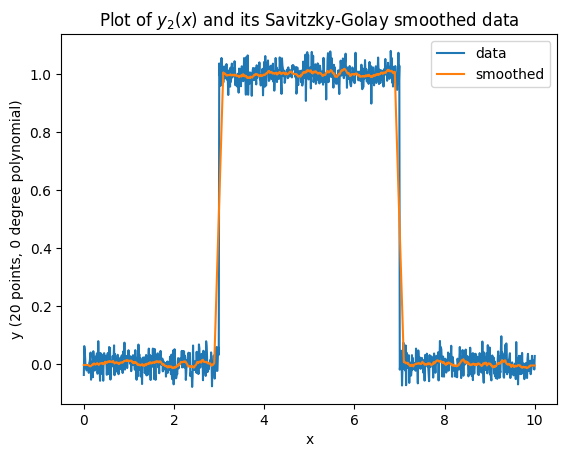

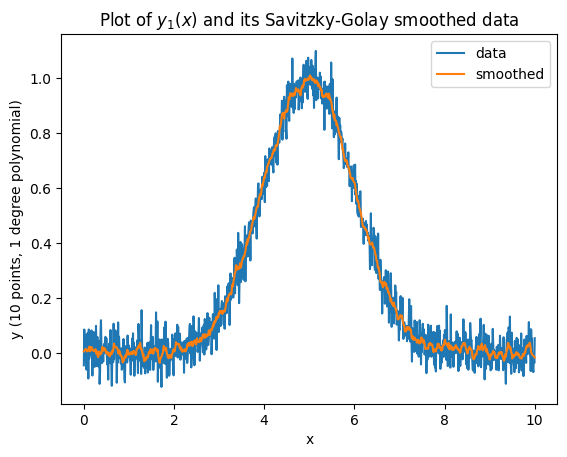

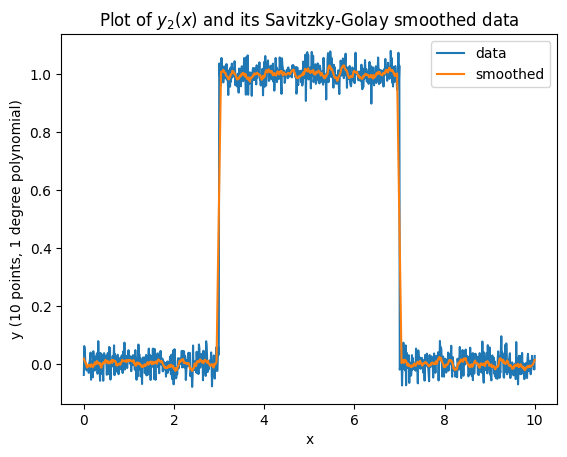

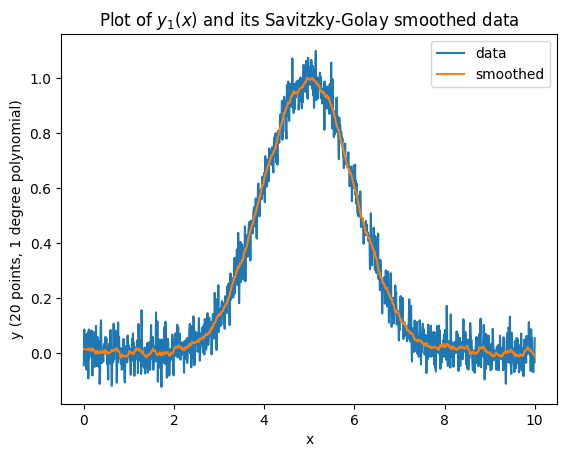

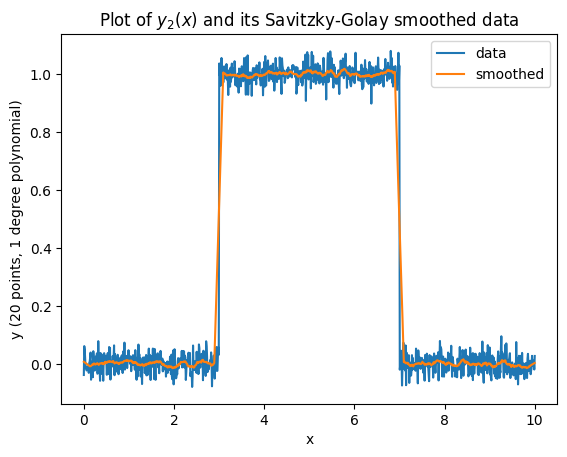

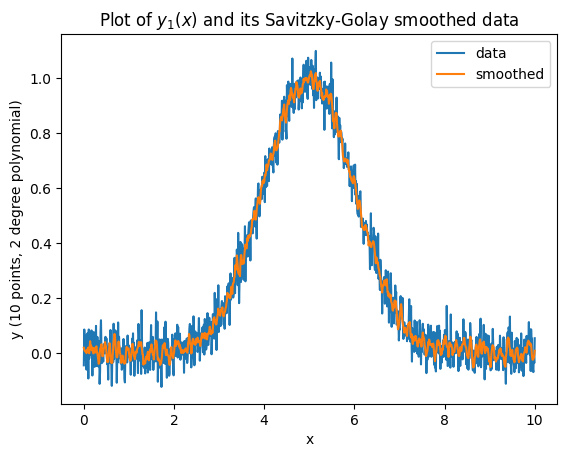

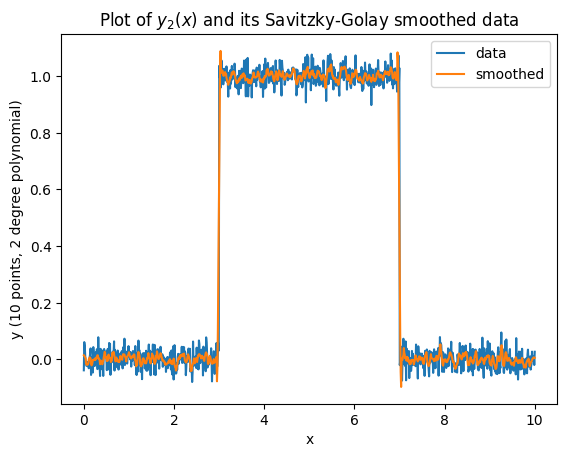

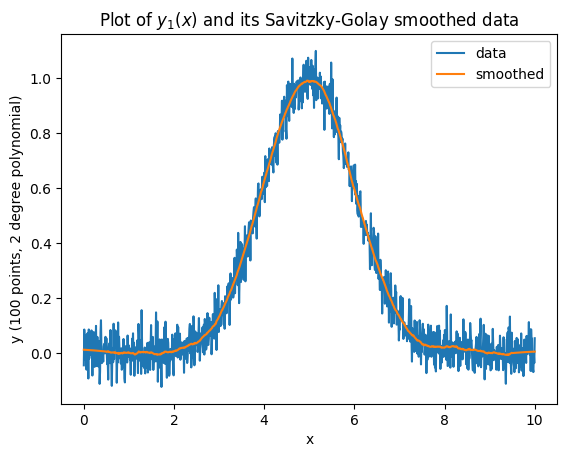

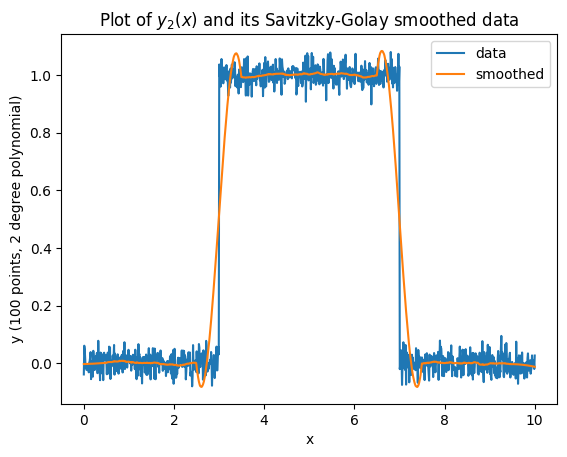

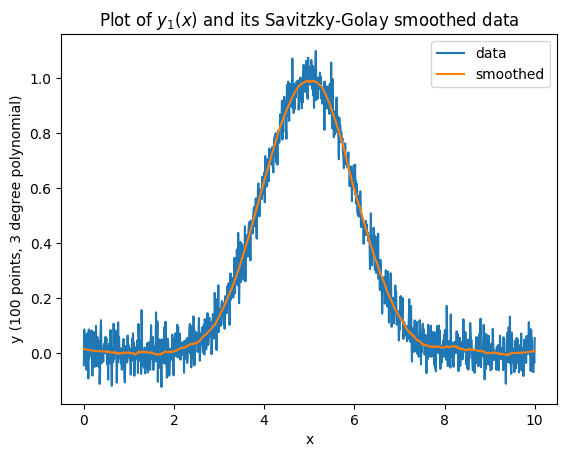

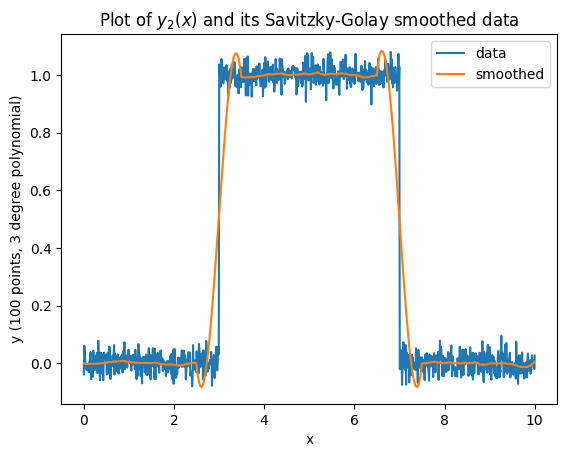

In [8]:
# define a plotting function:
def gplot(xdata, ydata, ndata, stri, win, pol):
    plt.plot(xdata, ydata,  label=r"data")
    plt.plot(xdata, ndata,  label=r"smoothed")
    plt.title("Plot of "+stri+" and its Savitzky-Golay smoothed data")
    plt.xlabel("x")
    plt.ylabel("y ("+str(win)+" points, "+str(pol)+" degree polynomial)")
    plt.legend()
    plt.show()

def savPlot(win, pol):
    # win = 10 # window length
    # pol = 1 # polynom for savgol-filter
    sav_data1 = savgol_filter(data3[:,1], win, pol)
    sav_data2 = savgol_filter(data3[:,2], win, pol)

    gplot(data3[:,0], data3[:,1], sav_data1, r"$y_1(x)$", win, pol)
    gplot(data3[:,0], data3[:,2], sav_data2, r"$y_2(x)$", win, pol)

savPlot(20, 0)
savPlot(10, 1)
savPlot(20, 1)
savPlot(10, 2)
savPlot(100, 2)
savPlot(100, 3)


In [17]:
ndata = data3[0:(data3[:,0].size-1),0]-data3[1:(data3[:,0].size),0]
print(np.min(ndata), np.max(ndata))

-0.010010010010010895 -0.010010010010010006


In [9]:
%%latex
The Savitzky-Golay filter is a filter, that creates the smoothed points by repeatedly applying a polynomial fit to the current point $y_i(x_i)$ by using the $n$ previous and the $n$ upcoming points $[y_{i-n}, \ldots, y_{i+n}]$. Since we do not pass any $x$-values to the python implementation, we have to make sure that the $x$-values are equally spaced.

As we can see, the best method for both datasets $Y_1$ and $Y_2$ seems to be the Savitzky-Golay fit using a polynomial of first degree. This is basically the same as moving average, since the point will be plotted in the middle of all the previous and all the upcoming points.

If we just consider the first dataset $Y_1$, which follows a Gaussian distribution, the best method is to use a second degree polynomial with high number of points $n$. This is because the second polynomial can represent the parts of the Gaussian curve very good.

The second dataset $Y_2$ can only be fitted accurately by using low numbers of points $n$ and low polynomials to have a good representation of the jump. Even the second polynomial seems to be too high.

To conclude, we can say, that generally it is better to try to use low polynomials. Using $n=10$ (so a window size of 20 $(x_i, y_i)$-values) with a polynomial of degree 18 results in bad smoothing. Depending on the function it might be better to use rather high number of points $n$, but be careful as you might lose the first $n$ points, as these have no proper window! If you have jumps, you should use a low number of points $n$. To dismiss the jumps, it is possible to apply the Savitzky-Golay filter on concrete parts of the function like one can see below.

<IPython.core.display.Latex object>

[-5.09062737e-02  3.51929983e-03 -1.10901415e-02  7.89605952e-04
  5.80943230e-02 -2.45643051e-02 -2.36854275e-02  2.67519536e-02
  5.69683499e-02  3.12011022e-02  1.03648099e+00  9.94970482e-01
  9.98514788e-01  9.59599470e-01  9.96131131e-01  1.05542301e+00
  1.02421374e+00  1.02644870e+00  1.01133084e+00  9.71123743e-01]
[0.0312011  1.03648099]


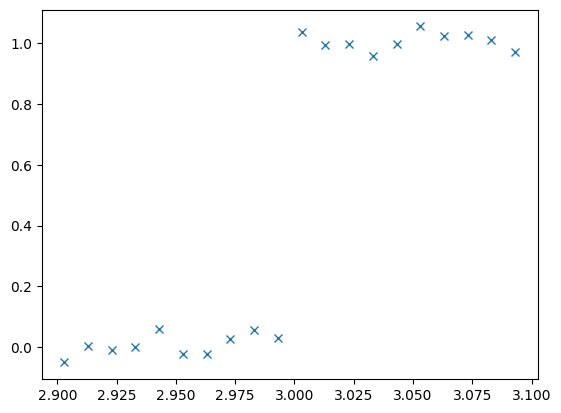

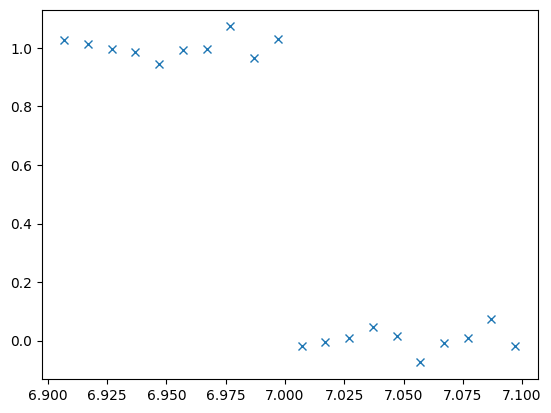

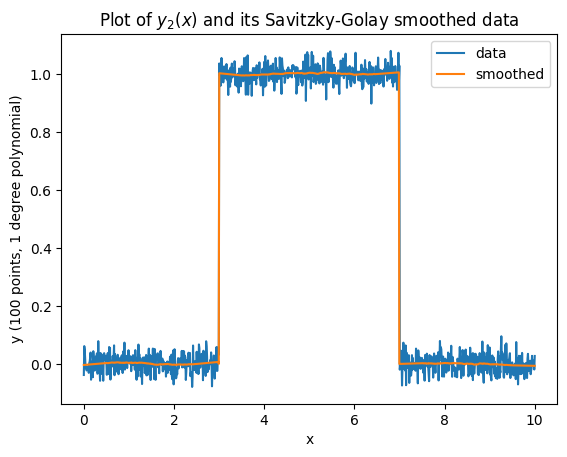

In [10]:
print(data3[290:310,2])
win = 100 # window length
pol = 1 # polynom for savgol-filter

# cut the data into different intervals and smoothen them:
sav_data0 = savgol_filter(data3[0:299,2], win, pol)
sav_data1 = savgol_filter(data3[300:699,2], win, pol)
sav_data2 = savgol_filter(data3[700:1000,2], win, pol)

# save the data:
ndata = np.zeros(data3[:,0].size)
ndata[0:299] = sav_data0
ndata[300:699] = sav_data1
ndata[700:1000] = sav_data2

# verify that there is the step:
print(data3[299:301,2])
plt.plot(data3[290:310,0], data3[290:310,2], "x")
plt.show()

plt.plot(data3[690:710,0], data3[690:710,2], "x")
plt.show()

# plot the smoothen data:
gplot(data3[:,0], data3[:,2], ndata, r"$y_2(x)$", win, pol)